In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# importing Keras and required libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam

In [3]:
# Importing the dataset

train_data = pd.read_json('train.json')
#test_data = pd.read_json('test.json')

In [4]:
train_data.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [5]:
#test_data.head()

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 62.7+ KB


In [7]:
train_data = train_data[train_data.inc_angle != 'na']

In [7]:
icebergs = train_data[train_data.is_iceberg == 1].sample(n=3, random_state=1)
ships = train_data[train_data.is_iceberg == 0].sample(n=3, random_state=1)

In [9]:
icebergs.band_1

1447    [-22.232338, -19.500736, -19.639769, -21.50825...
881     [-20.943770999999998, -22.030964, -24.724977, ...
121     [-20.755899, -19.012949, -18.019245, -18.37876...
Name: band_1, dtype: object

In [10]:
ships.band_1

120    [-31.046087, -29.553459, -30.519596, -32.84975...
127    [-24.738056, -24.500139, -23.823042, -26.32188...
469    [-25.698853, -26.821247, -28.110483, -30.04875...
Name: band_1, dtype: object

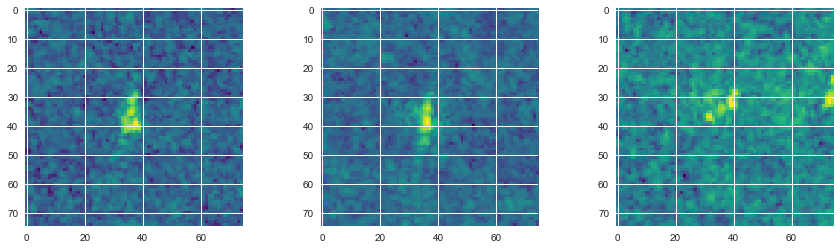

In [11]:
# Iceberg in band 1

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(np.reshape(icebergs.band_1[1447], (75, 75)), cmap='viridis')
axes[1].imshow(np.reshape(icebergs.band_1[881], (75, 75)), cmap='viridis')
axes[2].imshow(np.reshape(icebergs.band_1[121], (75, 75)), cmap='viridis')
plt.show()

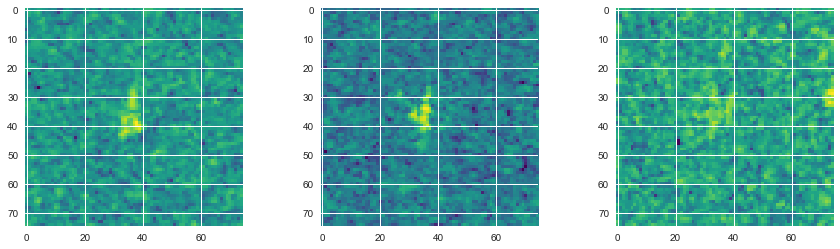

In [12]:
# Iceberg in band 2

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(np.reshape(icebergs.band_2[1447], (75, 75)), cmap='viridis')
axes[1].imshow(np.reshape(icebergs.band_2[881], (75, 75)), cmap='viridis')
axes[2].imshow(np.reshape(icebergs.band_2[121], (75, 75)), cmap='viridis')
plt.show()

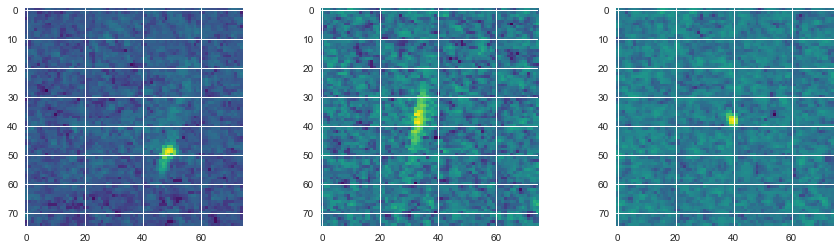

In [13]:
# Ships in band 1

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(np.reshape(ships.band_1[120], (75, 75)), cmap='viridis')
axes[1].imshow(np.reshape(ships.band_1[127], (75, 75)), cmap='viridis')
axes[2].imshow(np.reshape(ships.band_1[469], (75, 75)), cmap='viridis')
plt.show()

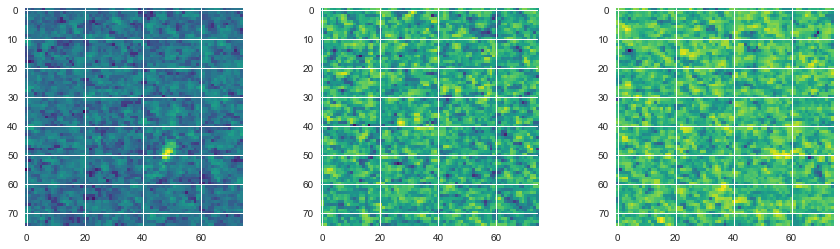

In [14]:
# Ships in band 2

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(np.reshape(ships.band_2[120], (75, 75)), cmap='viridis')
axes[1].imshow(np.reshape(ships.band_2[127], (75, 75)), cmap='viridis')
axes[2].imshow(np.reshape(ships.band_2[469], (75, 75)), cmap='viridis')
plt.show()

In [15]:
# Trying various filters 

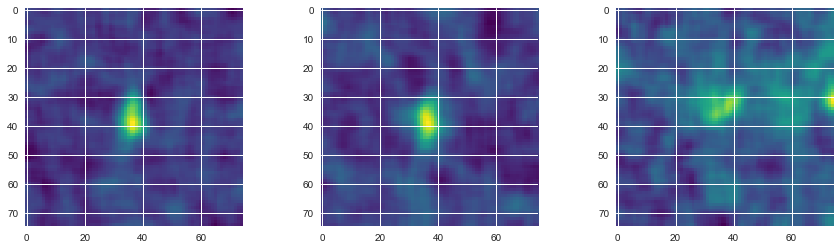

In [16]:
# Smoothing the images

# Iceberg in band 1 smoothed

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_1[1447], (75, 75)), size=6), cmap='viridis')
axes[1].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_1[881], (75, 75)), size=6), cmap='viridis')
axes[2].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_1[121], (75, 75)), size=6), cmap='viridis')
plt.show()

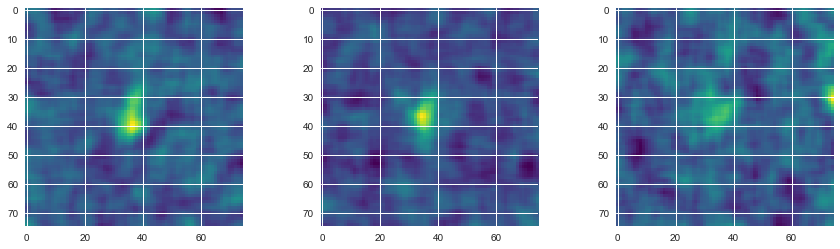

In [17]:
# Smoothing the images

# Iceberg in band 2 smoothed

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_2[1447], (75, 75)), size=6), cmap='viridis')
axes[1].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_2[881], (75, 75)), size=6), cmap='viridis')
axes[2].imshow(ndimage.uniform_filter(np.reshape(icebergs.band_2[121], (75, 75)), size=6), cmap='viridis')
plt.show()

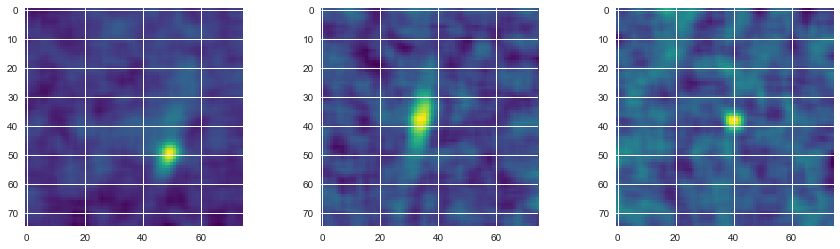

In [18]:
# Smoothing the images

# Ships in band 1 smoothed

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.uniform_filter(np.reshape(ships.band_1[120], (75, 75)), size=6), cmap='viridis')
axes[1].imshow(ndimage.uniform_filter(np.reshape(ships.band_1[127], (75, 75)), size=6), cmap='viridis')
axes[2].imshow(ndimage.uniform_filter(np.reshape(ships.band_1[469], (75, 75)), size=6), cmap='viridis')
plt.show()

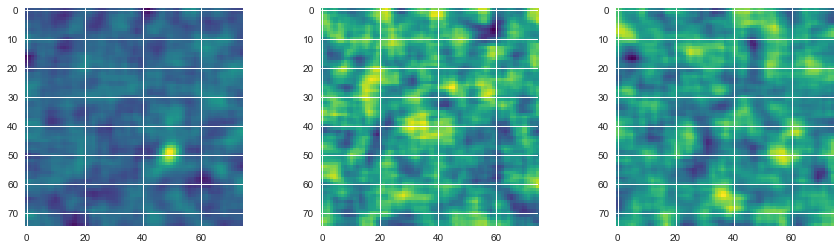

In [19]:
# Smoothing the images

# Ships in band 2 smoothed

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.uniform_filter(np.reshape(ships.band_2[120], (75, 75)), size=6), cmap='viridis')
axes[1].imshow(ndimage.uniform_filter(np.reshape(ships.band_2[127], (75, 75)), size=6), cmap='viridis')
axes[2].imshow(ndimage.uniform_filter(np.reshape(ships.band_2[469], (75, 75)), size=6), cmap='viridis')
plt.show()

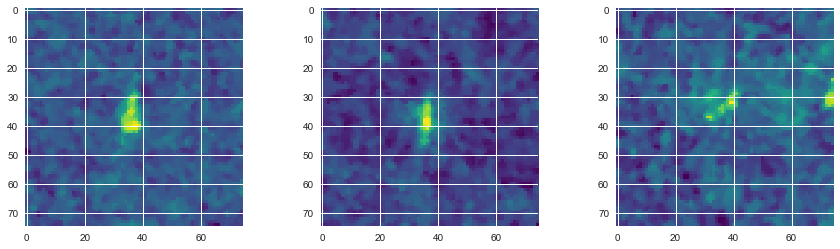

In [20]:
# Denoising the images

# Iceberg in band 1 denoised

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.median_filter(np.reshape(icebergs.band_1[1447], (75, 75)), 3), cmap='viridis')
axes[1].imshow(ndimage.median_filter(np.reshape(icebergs.band_1[881], (75, 75)), 3), cmap='viridis')
axes[2].imshow(ndimage.median_filter(np.reshape(icebergs.band_1[121], (75, 75)), 3), cmap='viridis')
plt.show()

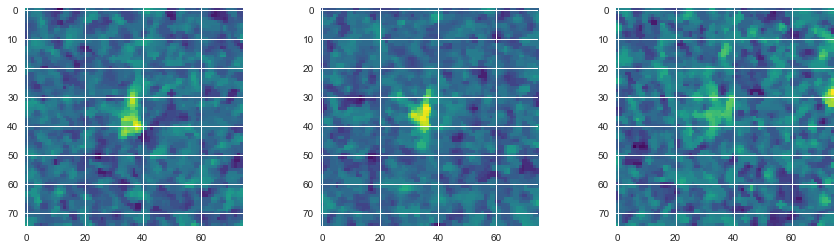

In [21]:
# Denoising the images

# Iceberg in band 2 denoised

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.median_filter(np.reshape(icebergs.band_2[1447], (75, 75)), 3), cmap='viridis')
axes[1].imshow(ndimage.median_filter(np.reshape(icebergs.band_2[881], (75, 75)), 3), cmap='viridis')
axes[2].imshow(ndimage.median_filter(np.reshape(icebergs.band_2[121], (75, 75)), 3), cmap='viridis')
plt.show()

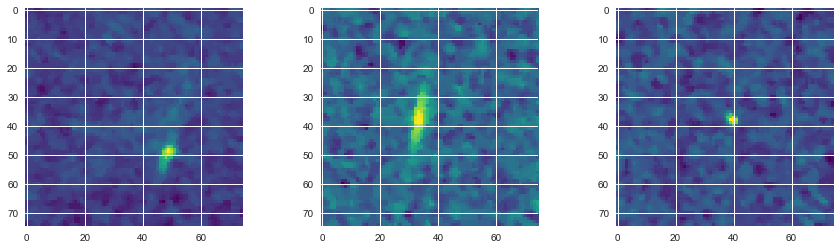

In [22]:
# Ships in band 1 denoised

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.median_filter(np.reshape(ships.band_1[120], (75, 75)), 3), cmap='viridis')
axes[1].imshow(ndimage.median_filter(np.reshape(ships.band_1[127], (75, 75)), 3), cmap='viridis')
axes[2].imshow(ndimage.median_filter(np.reshape(ships.band_1[469], (75, 75)), 3), cmap='viridis')
plt.show()

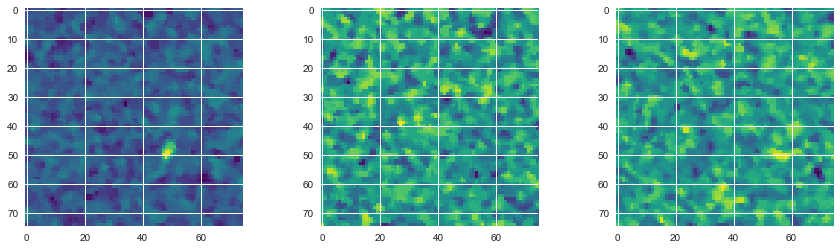

In [23]:
# Ships in band 2 denoised

fx, axes = plt.subplots(1, 3, figsize=(15,4)) 
axes[0].imshow(ndimage.median_filter(np.reshape(ships.band_2[120], (75, 75)), 3), cmap='viridis')
axes[1].imshow(ndimage.median_filter(np.reshape(ships.band_2[127], (75, 75)), 3), cmap='viridis')
axes[2].imshow(ndimage.median_filter(np.reshape(ships.band_2[469], (75, 75)), 3), cmap='viridis')
plt.show()

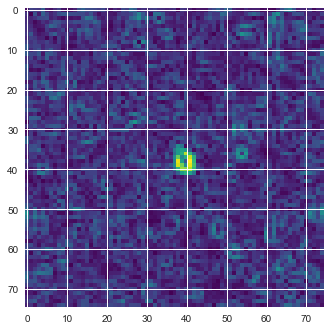

In [24]:
# Feature Detection

sx = ndimage.sobel(np.reshape(ships.band_1[469], (75, 75)), axis=0, mode='wrap')
sy = ndimage.sobel(np.reshape(ships.band_1[469], (75, 75)), axis=1, mode='wrap')
sob = np.hypot(sx, sy)
plt.imshow(sob, cmap='viridis')
plt.show()

In [8]:
# Processing Input Data

def processData(dataset):
    
    trainset = []
    
    for i, row in dataset.iterrows():
        
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2
        band_4 = band_1 - band_2
        
        # Adding Feature Detection
        sx1 = ndimage.sobel(band_1, axis=0, mode='wrap')
        sy1 = ndimage.sobel(band_1, axis=1, mode='wrap')
        fd1 = np.hypot(sx1, sy1)
        sx2 = ndimage.sobel(band_2, axis=0, mode='wrap')
        sy2 = ndimage.sobel(band_2, axis=1, mode='wrap')
        fd2 = np.hypot(sx2, sy2)
        
        fd1_norm = (fd1 - fd1.mean()) / (fd1.max() - fd1.min())
        fd2_norm = (fd2 - fd2.mean()) / (fd2.max() - fd2.min())
    
        band_1_norm = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        band_2_norm = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        band_3_norm = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())
        band_4_norm = (band_4 - band_4.mean()) / (band_4.max() - band_4.min())
        trainset.append(np.dstack((band_1_norm, band_2_norm, band_3_norm, band_4_norm, fd1_norm, fd2_norm)))
    return np.array(trainset)

In [9]:
X = processData(train_data)
y = np.array(train_data['is_iceberg'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
X_train.shape

(1323, 75, 75, 6)

In [12]:
# Building the convolutional neural network

classifier = Sequential()

# Adding the first 2 convolution layer

classifier.add(Conv2D(64, (3, 3), input_shape=(75, 75, 6), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))

# Pooling layer

classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the second 2 convolution layer

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(Conv2D(128, (3, 3), activation='relu'))

# 2nd Pooling layer

classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the third 2 convolution layer

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling layer

classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Dropout(.1))

# Adding the flattening layer

classifier.add(Flatten())

# Adding the ANN

classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

In [13]:
# Dynamic Reduction of Learning rate when accuracy reaches plateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=3, min_lr=0.0001)

In [14]:
# Compiling the ANN

classifier.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(zoom_range=0.2,
                                   rotation_range=30,
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_datagen.fit(X_train)

In [16]:
# Fitting the model to data

#classifier.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[reduce_lr])

classifier.fit_generator(
        train_datagen.flow(X_train, y_train, batch_size=32),
        epochs=50,
        validation_data=(X_test,y_test),callbacks=[reduce_lr])

Epoch 1/50
42/42 [==============================] - 187s 4s/step - loss: 0.6931 - acc: 0.4989 - val_loss: 0.6740 - val_acc: 0.5203
Epoch 2/50
42/42 [==============================] - 183s 4s/step - loss: 0.6929 - acc: 0.4969 - val_loss: 0.6932 - val_acc: 0.4797
Epoch 3/50
42/42 [==============================] - 184s 4s/step - loss: 0.6930 - acc: 0.5085 - val_loss: 0.6927 - val_acc: 0.5203
Epoch 4/50
42/42 [==============================] - 181s 4s/step - loss: 0.6930 - acc: 0.5150 - val_loss: 0.6925 - val_acc: 0.5203
Epoch 5/50
42/42 [==============================] - 180s 4s/step - loss: 0.6932 - acc: 0.5115 - val_loss: 0.6924 - val_acc: 0.5203
Epoch 6/50
42/42 [==============================] - 178s 4s/step - loss: 0.6930 - acc: 0.5129 - val_loss: 0.6925 - val_acc: 0.5203
Epoch 7/50
42/42 [==============================] - 176s 4s/step - loss: 0.6928 - acc: 0.5087 - val_loss: 0.6925 - val_acc: 0.5203
Epoch 8/50
42/42 [==============================] - 176s 4s/step - loss: 0.6926 - a

In [ ]:
# Predictions

test_data = pd.read_json('test.json')